In [ ]:
!pip install faker textblob


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 24.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from faker import Faker
from textblob import TextBlob

In [ ]:
import pandas as pd
import importlib_metadata

print("pandas", pd.__version__)
print("textblob", importlib_metadata.version("textblob"))
print("faker", importlib_metadata.version("faker"))


pandas 2.2.2
textblob 0.19.0
faker 37.3.0


In [ ]:
!pip install faker spacy vaderSentiment seaborn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.8 MB/s eta 0:00:00


In [ ]:
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [ ]:
!pip install faker spacy vaderSentiment seaborn
!python -m spacy download en_core_web_sm

import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from faker import Faker
import random

fake = Faker()
nlp = spacy.load("en_core_web_sm")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 72.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load('en_core_web_sm')
analyzer = SentimentIntensityAnalyzer()

In [ ]:
data = {
    'CustomerID': [i for i in range(1, 101)],
    'Name': [fake.name() for _ in range(100)],
    'FeedbackDate': [fake.date_this_decade() for _ in range(100)],
    'FeedbackText': [fake.text() for _ in range (100)],
    'FeedbackScore': [random.randint(1,5) for _ in range(100)]

}

df = pd.DataFrame(data)

In [ ]:
df.to_csv('customer_feedback.csv', index = False)

In [ ]:
def preprocess_text_spacy(text):
    doc = nlp(text.lower())
    return [token.text for token in doc if not token.is_stop and not token.is_punct]

df['ProcessedFeedback'] = df['FeedbackText'].apply(preprocess_text_spacy)


In [ ]:
def get_sentiment_textblob(tokens):
    text = " ".join(tokens)
    blob = TextBlob(text)
    return blob.sentiment.polarity

df['SentimentTextBlob'] = df['ProcessedFeedback'].apply(get_sentiment_textblob)

In [ ]:
#sentiment analysis using VADER
def get_sentiment_vader(text):
    sentiment = analyzer.polarity_scores(text)
    return sentiment['compound']

df['SentimentVader'] = df['FeedbackText'].apply(get_sentiment_vader)

In [ ]:
def categorize_sentiment_custom(score):
    if score > 0.1:
        return 'Satisfactory'
    elif score < -0.1:
        return 'Unsatisfactory'
    else:
        return 'Neutral'


In [ ]:
df['SentimentCategoryTextBlob'] = df['SentimentTextBlob'].apply(categorize_sentiment_custom)
df['SentimentCategoryVader'] = df['SentimentVader'].apply(categorize_sentiment_custom)

In [ ]:
sentiment_counts_textblob = df['SentimentCategoryTextBlob'].value_counts()
sentiment_counts_vader = df['SentimentCategoryVader'].value_counts()

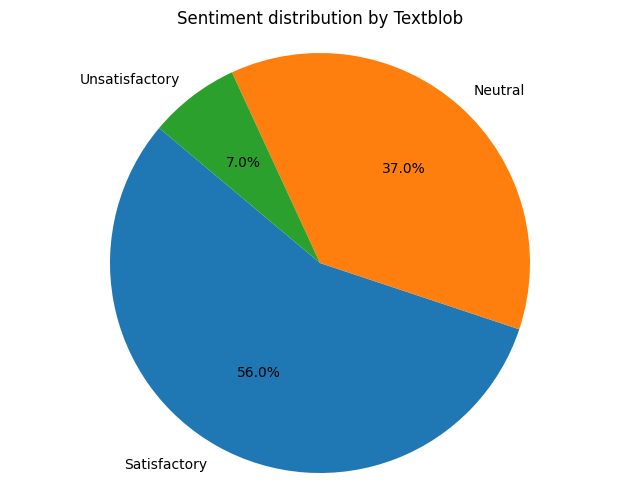

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts_textblob, labels = sentiment_counts_textblob.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Sentiment distribution by Textblob')
plt.axis('equal') #to ensure that the pie chart is circular.
plt.show()

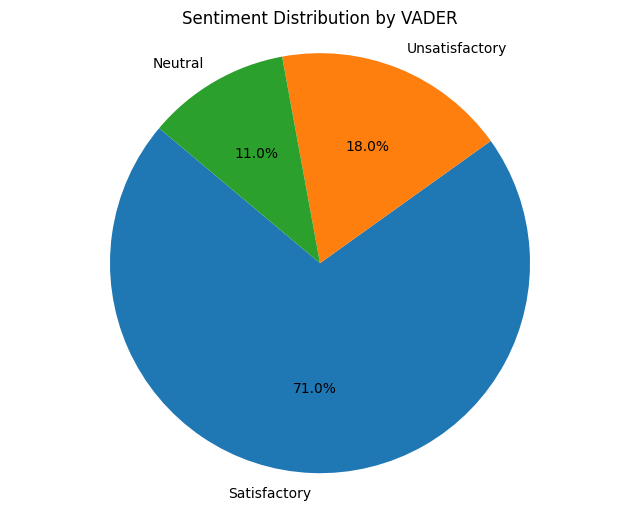

In [ ]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts_vader, labels = sentiment_counts_vader.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Sentiment Distribution by VADER')
plt.axis('equal')
plt.show()
#thankyou beyonce yet again

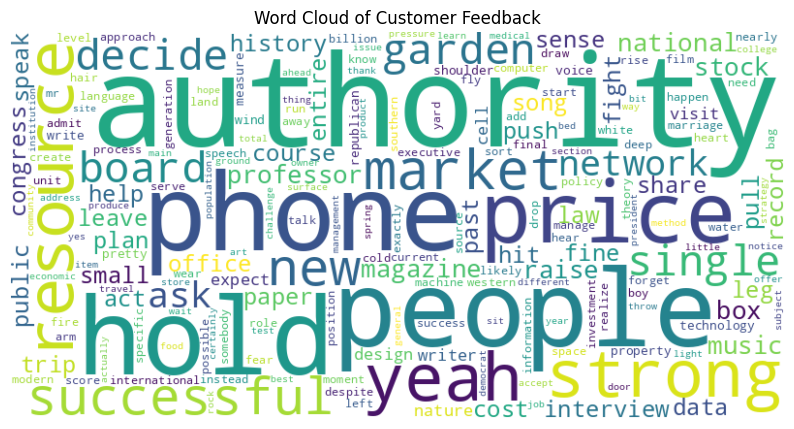

In [ ]:
from wordcloud import WordCloud

all_words = ' '.join([' '.join(tokens) for tokens in df['ProcessedFeedback']])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Feedback')
plt.show()


In [ ]:
import pickle
with open('model.pkl' , 'wb') as file:
    pickle.dump (df,file)